In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [13]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

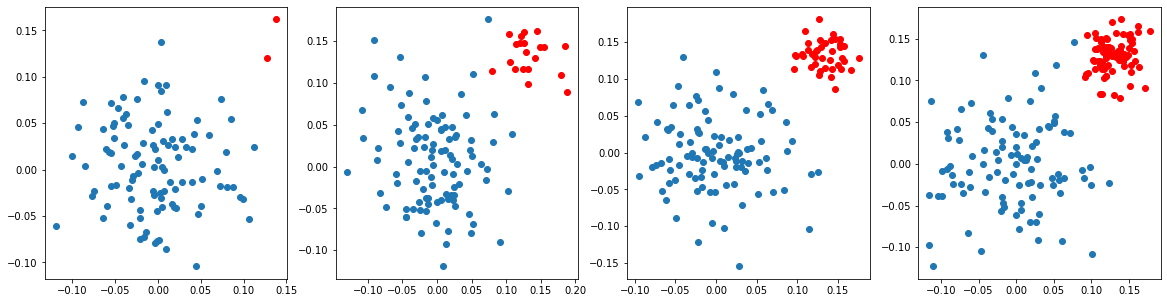

In [14]:
# here we are creating 2d imbalanced data points 
C = [0.001, 1, 100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

In [15]:
#create svm model with below parameters
svm = SVC(kernel = 'linear', C=100)
#fit the model with train dataset
svm.fit(X, y)
#predict the y values
y_svm_pred = svm.predict(X)

In [16]:
#svm model coefficient and intercept
print(list(svm.coef_))
print(svm.intercept_)

[array([-22.04922181, -15.14788388])]
[3.10866108]


In [17]:
#assigning minimum and maximum values

min = np.min(X[:, 1])
max = np.max(X[:, 1])
print(min, max)

-0.1229679307495934 0.17330521624930356


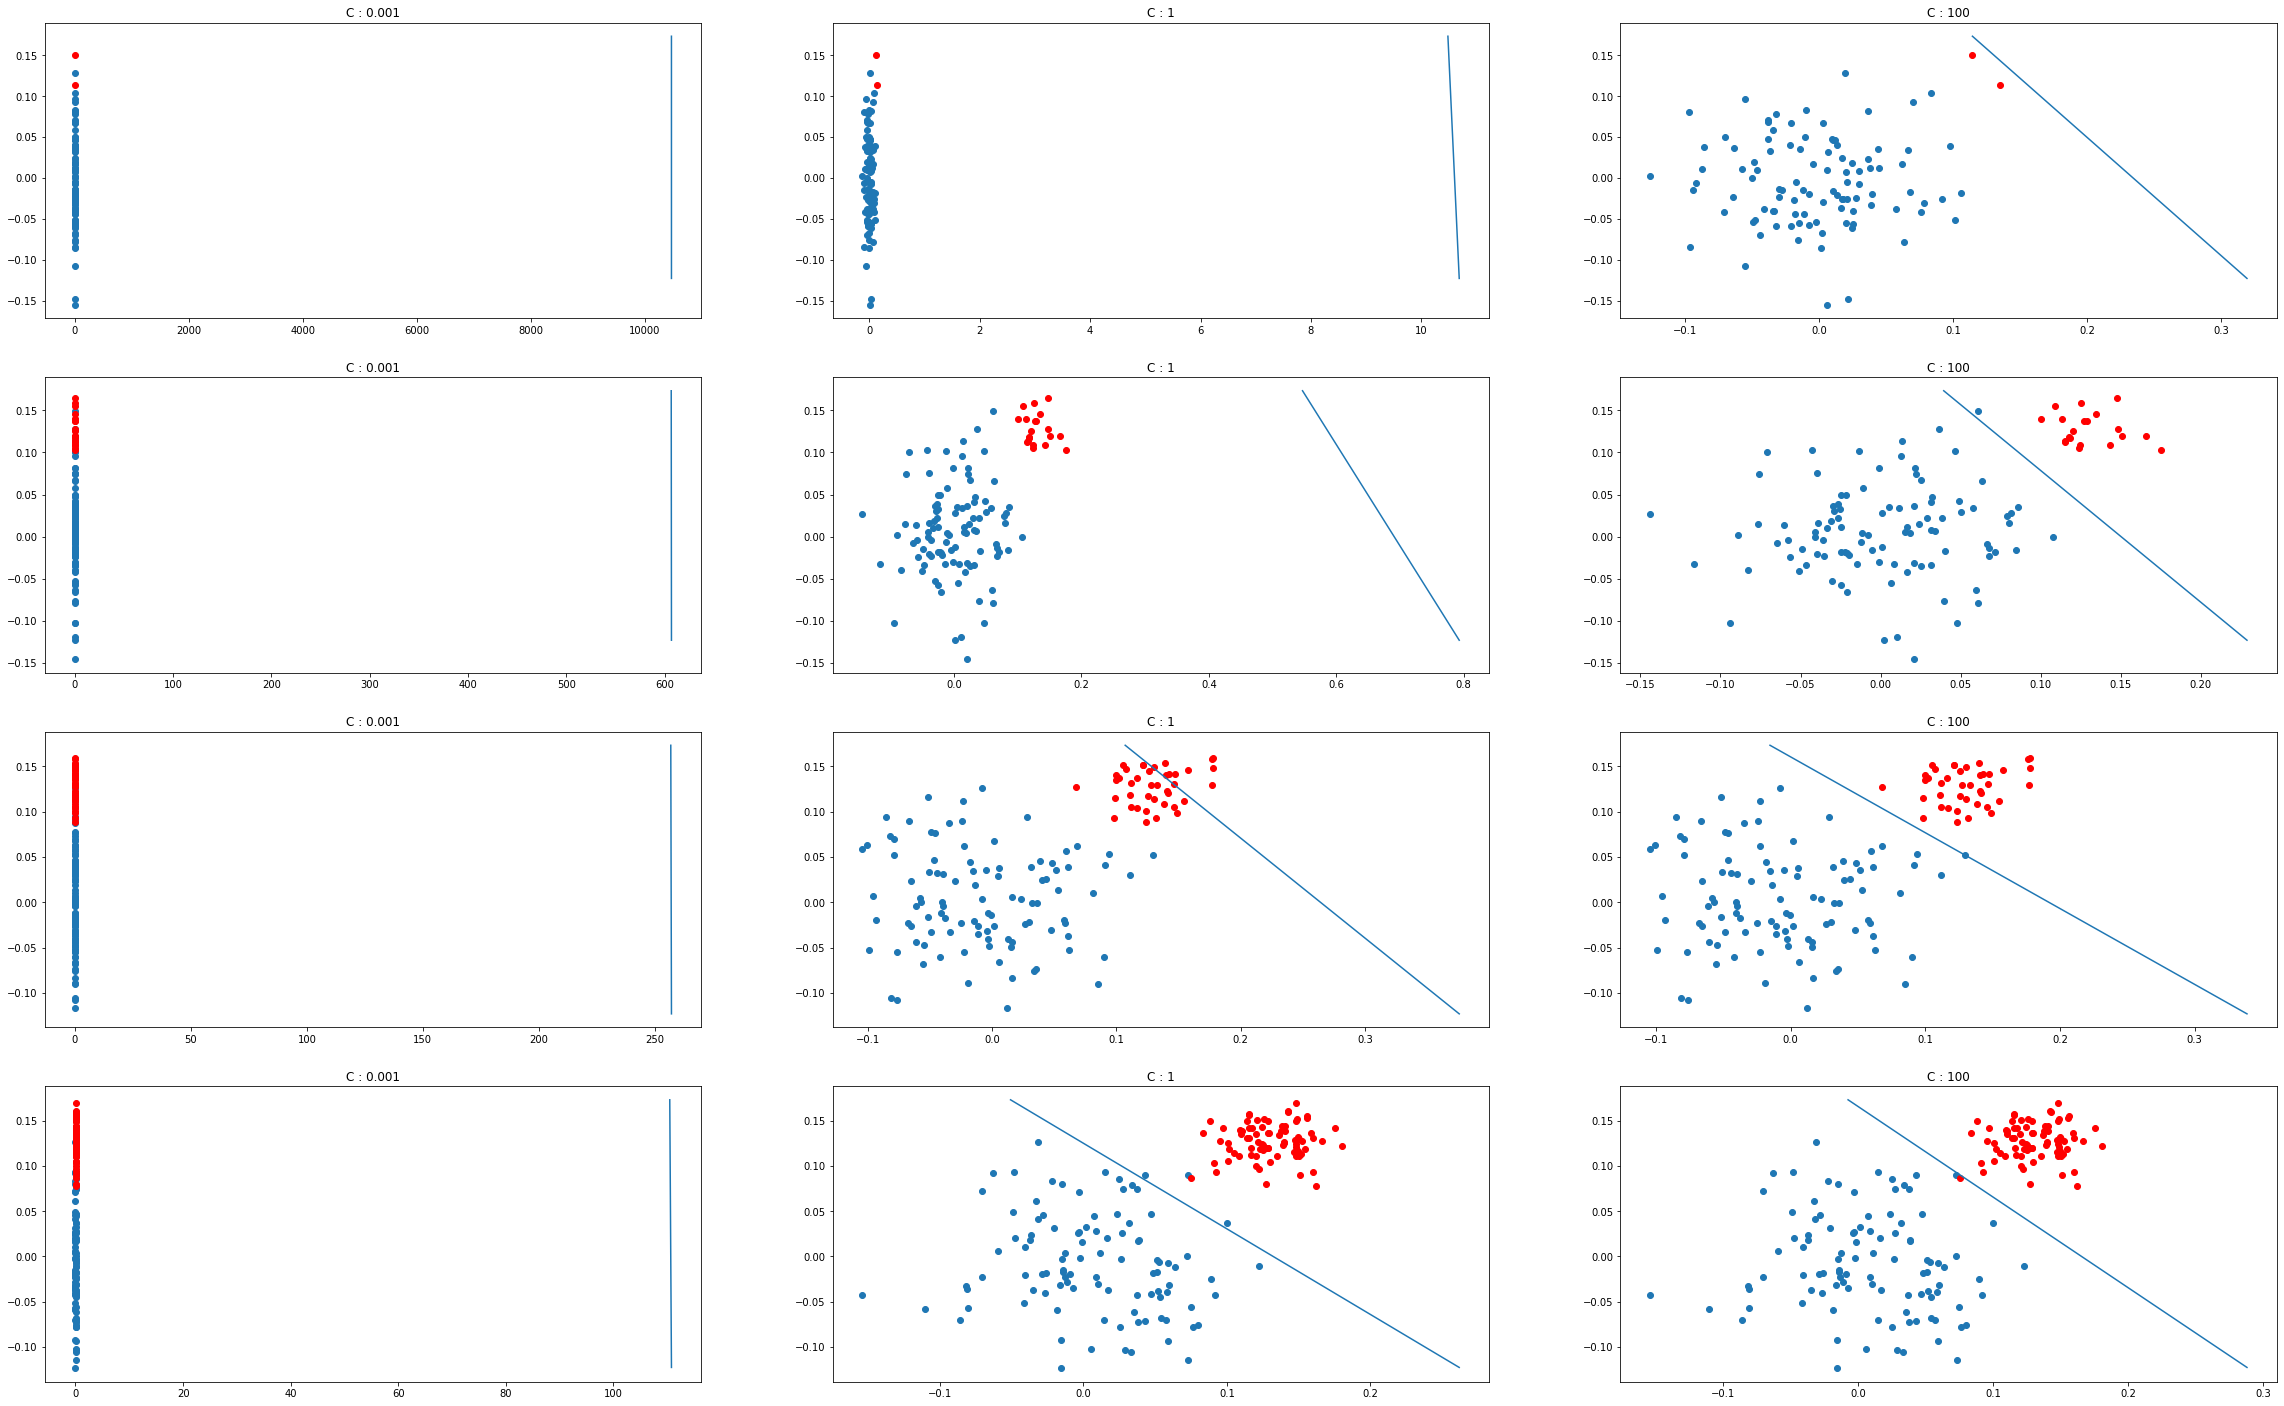

In [19]:
plt.figure(figsize=(40,25))
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
C = [0.001,1,100]
img = 0
for j, k in enumerate(ratios):
  #plt.figure(figsize=(20,15))
  X_p=np.random.normal(0,0.05,size=(k[0],2))
  X_n=np.random.normal(0.13,0.02,size=(k[1],2))
  y_p=np.array([1]*k[0]).reshape(-1,1)
  y_n=np.array([0]*k[1]).reshape(-1,1)
  X=np.vstack((X_p,X_n))
  y=np.vstack((y_p,y_n))
  for i in range(len(C)):
    img += 1
    # plt.subplot(4,3,i+1)
    svm = SVC(kernel = 'linear', C=C[i])
    svm.fit(X, y)
    #y_svm_pred = svm.predict(X)
    points_svm=np.array([[((-svm.coef_[0][1]*min - svm.intercept_)/svm.coef_[0][0]), min],[((-svm.coef_[0][1]*max - svm.intercept_)/svm.coef_[0][0]), max]])
    #plt.subplot(4,3,img).plot(points_svm[:,0], points_svm[:,1])
    plt.subplot(4,3,img).scatter(X_p[:,0],X_p[:,1])
    plt.subplot(4,3,img).scatter(X_n[:,0],X_n[:,1],color='red')
    #draw_line(svm.coef_.flatten(),svm.intercept_[0],min, max)
    draw_line(svm.coef_.flatten(),svm.intercept_[0],min, max)
    plt.title(f'C : {C[i]}')
plt.show()

In [20]:
print(points_svm)

[[array([0.28789649]) -0.1229679307495934]
 [array([-0.00739867]) 0.17330521624930356]]


Logistic Regression

In [21]:
#create logistic regression model
clf = LogisticRegression(n_jobs = -1, C = 1)
#fit the model with train dataset
clf.fit(X, y)
#predict y values
y_pred = clf.predict(X)

In [22]:
#logistic regression model's coefficient and intercept
print(clf.coef_)
print(clf.intercept_)

[[-3.894223   -4.20290954]]
[0.70440257]


In [29]:
#assigning minimum and maximum values from logistic regression
min_l = np.min(X[:, 1])
max_l = np.max(X[:, 1])

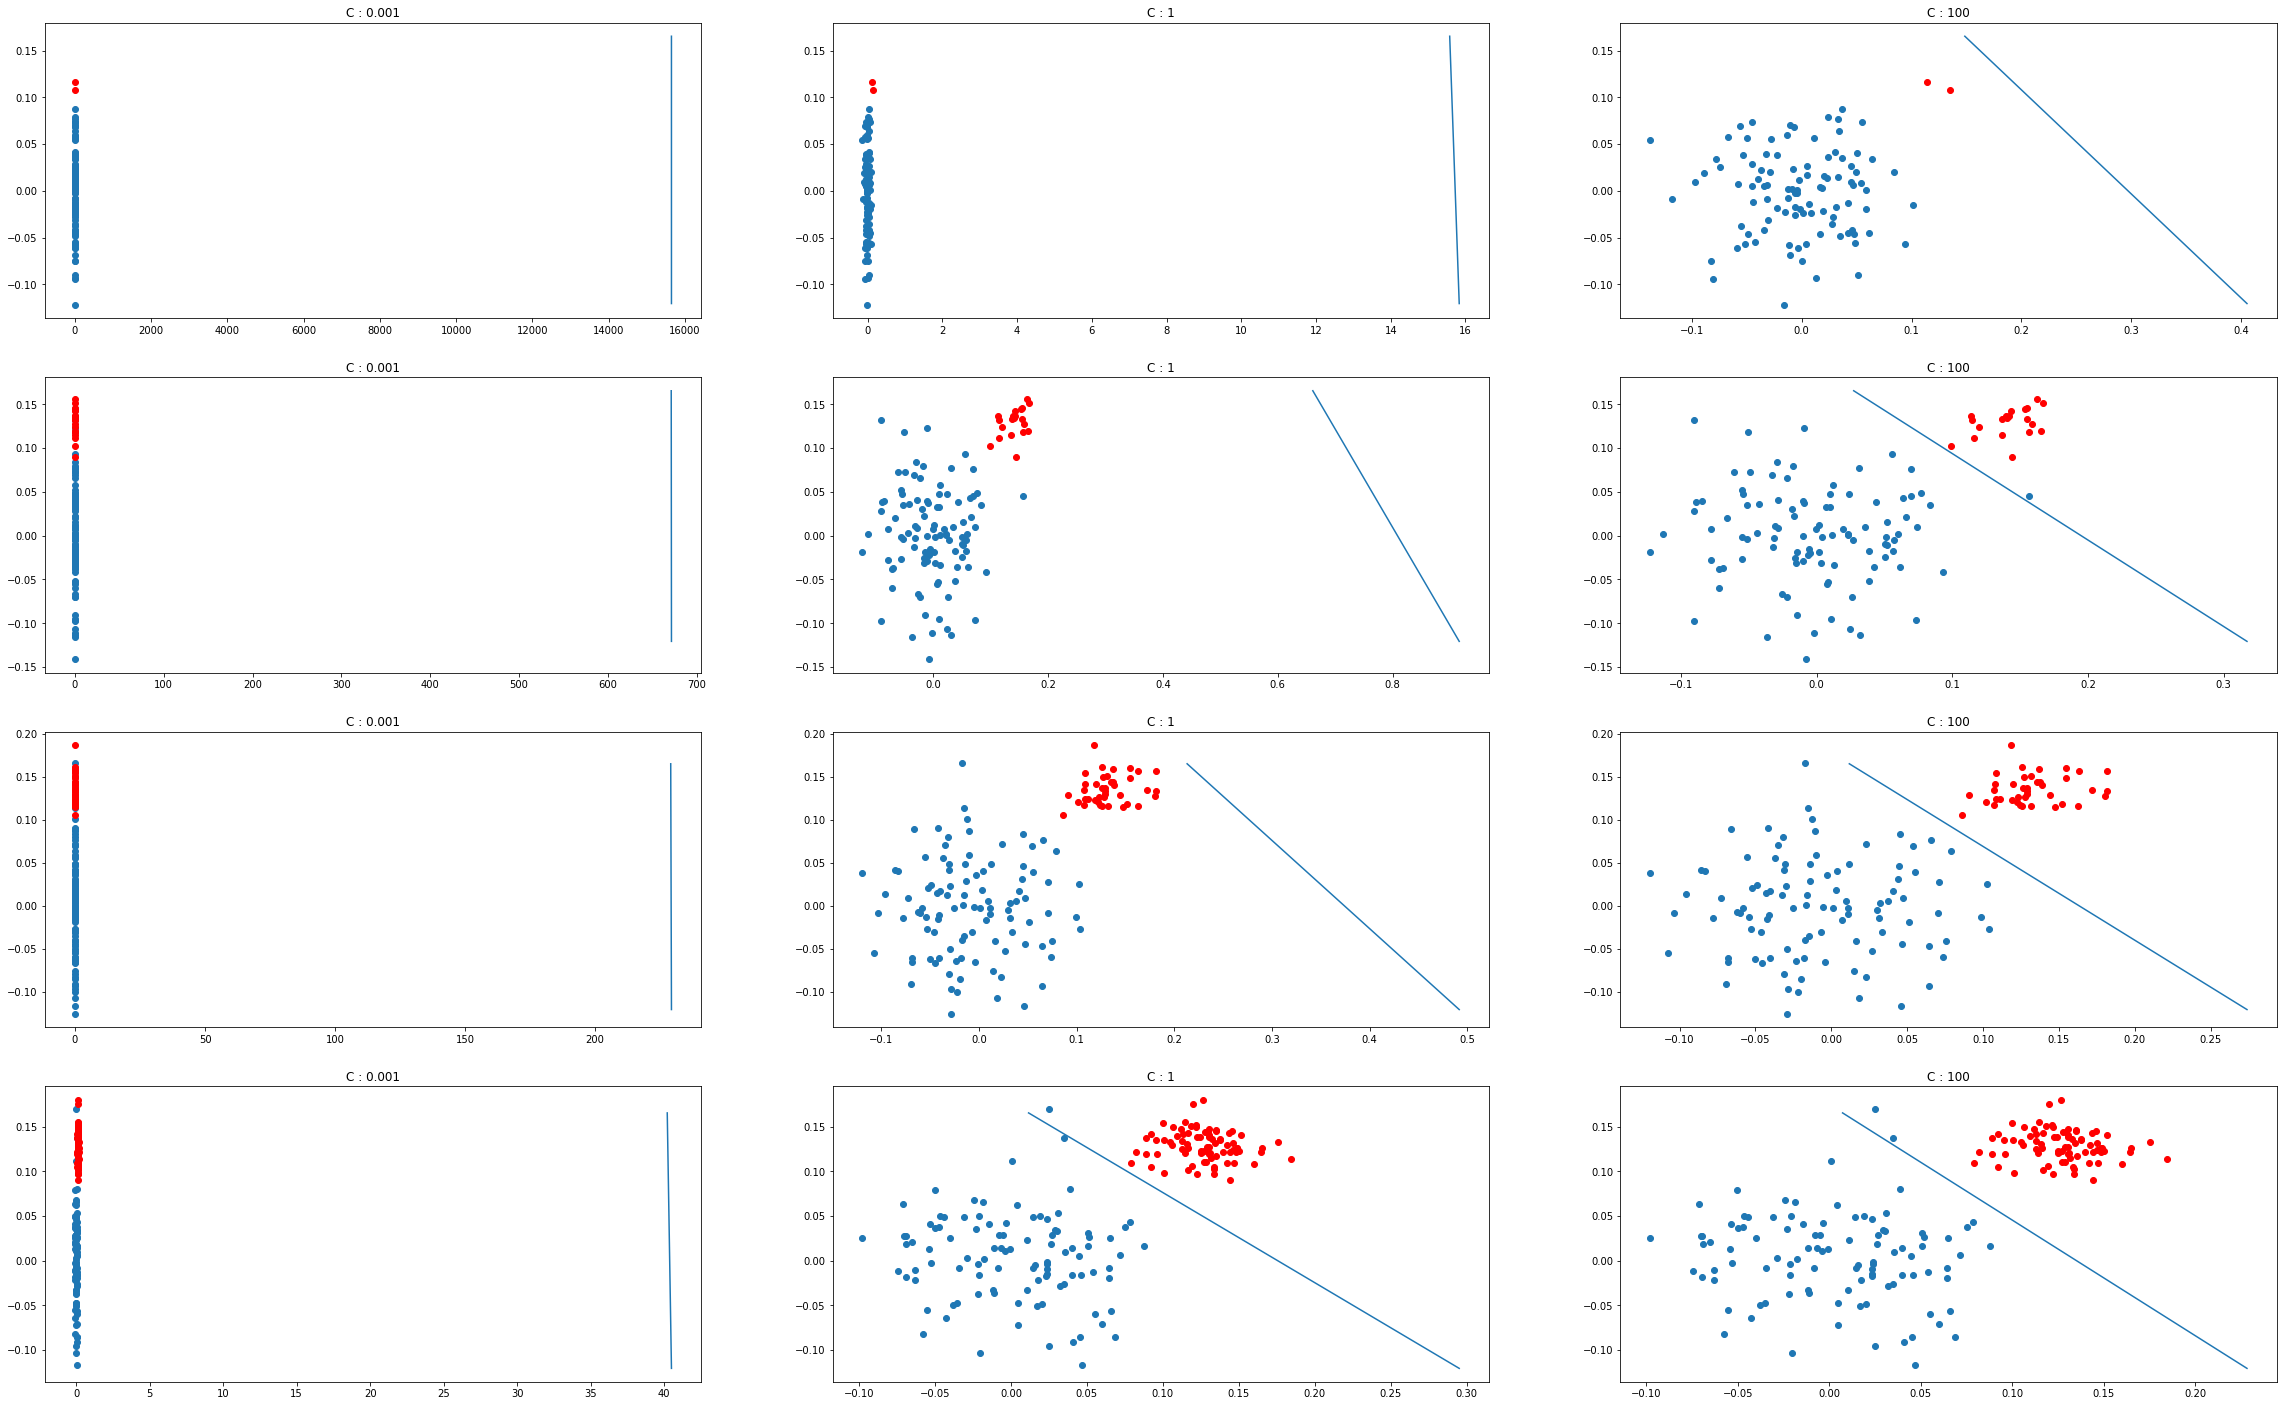

In [30]:
plt.figure(figsize=(40,25))
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
C = [0.001,1,100]
img2 = 0
for j, k in enumerate(ratios):
  X_p=np.random.normal(0,0.05,size=(k[0],2))
  X_n=np.random.normal(0.13,0.02,size=(k[1],2))
  y_p=np.array([1]*k[0]).reshape(-1,1)
  y_n=np.array([0]*k[1]).reshape(-1,1)
  X=np.vstack((X_p,X_n))
  y=np.vstack((y_p,y_n))
  for i in range(len(C)):
    img2 += 1
    clf = LogisticRegression(n_jobs = -1, C = C[i])
    clf.fit(X, y)
    y_pred = clf.predict(X)
    #points=np.array([[((-clf.coef_[0][1]*min_l - clf.intercept_)/clf.coef_[0][0]), min_l],[((-clf.coef_[0][1]*max_l - clf.intercept_)/clf.coef_[0][0]), max_l]])
    #plt.plot(points[:,0], points[:,1])
    # points=np.array([[((-clf.coef_[0][1]*min_l - clf.intercept_)/clf.coef_[0][0]), min_l],[((-clf.coef_[0][1]*max_l - clf.intercept_)/clf.coef_[0][0]), max_l]])
    # plt.plot(points[:,0], points[:,1])
    plt.subplot(4,3,img2).scatter(X_p[:,0],X_p[:,1])
    plt.subplot(4,3,img2).scatter(X_n[:,0],X_n[:,1],color='red')
    draw_line(clf.coef_.flatten(), clf.intercept_[0], min_l, max_l)
    plt.title(f'C : {C[i]}')
plt.show()